In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


from google.colab import drive: Imports the drive module from Google Colab.  
drive.mount('/content/drive'): Mounts Google Drive to the specified directory.

In [ ]:
!ls /content/drive/MyDrive/carbrand

README.dataset.txt  README.roboflow.txt  test  train  valid


!ls: Allows us to use shell commands within Colab.          
'/content/drive/MyDrive/carbrand': Specifies the car brand folder on Google Drive.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

#2
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/carbrand/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

#3

validation_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/carbrand/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

#4

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/carbrand/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 5178 images belonging to 7 classes.
Found 1215 images belonging to 7 classes.
Found 514 images belonging to 7 classes.


1-) ImageDataGenerator: A Keras class used for processing and scaling image data.    
rescale=1./255: Transforms pixel values from the range 0-255 to 0-1.   

2-)Load training data,             
 -flow_from_directory: Fetches data from the specified folder.     
- target_size=(224, 224): Adjusts the images to the input size of the model.   
- batch_size=32: Sets the number of images processed simultaneously.
- class_mode='sparse': Provides classification labels as indices (e.g., 0, 1, 2).  
This structure ensures that the model receives data in a continuous flow.

3-)Load validation data,                 
Validation data helps evaluate the model's generalization capability during training.The structure is the same as the training data loader but specifically for validation.

4-)Load test data,
-shuffle=False: Loads test data without shuffling to maintain the correct order.                  
-Unlike training and validation data, it is specifically used for independent accuracy measurement.




In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
from io import StringIO
import sys

#2
# Create Model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', name='Conv2D_1'),
    MaxPooling2D(2,2, name='MaxPool_1'),

    Conv2D(64, (3,3), activation='relu', name='Conv2D_2'),
    MaxPooling2D(2,2, name='MaxPool_2'),

    Conv2D(128, (3,3), activation='relu', name='Conv2D_3'),
    MaxPooling2D(2,2, name='MaxPool_3'),

    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dropout(0.6, name='Dropout'),
    Dense(7, activation='softmax', name='Output')
])

#3

stream = StringIO()
sys.stdout = stream
model.summary()
sys.stdout = sys.__stdout__

summary_str = stream.getvalue()

summary_lines = summary_str.split('\n')

layer_info = []
for line in summary_lines[2:-4]:
    parts = line.split()
    if len(parts) >= 4:
        layer_name = parts[0]
        layer_type = parts[1]
        output_shape = ' '.join(parts[2:-1])
        num_params = parts[-1]
        layer_info.append([layer_name, layer_type, output_shape, num_params])

model_df = pd.DataFrame(layer_info, columns=['Layer Name', 'Layer Type', 'Output Shape', 'Param #'])
print("CNN Model Yapısı:")
print(model_df)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_3 (MaxPooling2D)        │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

1-) This code block imports the necessary libraries for model building and result formatting.     

2-)-Sequential: Used to stack layers sequentially.             
-Input: Defines the input shape (224x224x3).
-Conv2D: Adds convolutional layers., First layer has 32 filters, second has 64, third has 128.          
-MaxPooling2D:Reduces dimensionality (2x2 pooling).   
-Flatten: Converts multi-dimensional data to a single dimension.            
-Dense: Fully connected layer with 128 neurons.   
-Dropout: Reduces overfitting by randomly dropping 60% of neurons.       
-Output: Final layer with softmax activation (7 classes).

3-)This code block formats the model summary as a table.         
-StringIO: Captures the model summary as text.           
-sys.stdout: Redirects standard output to capture.         
-Table creation: Displays each layer as a table row.



In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#compile cnn

This code block compiles the CNN model to make it ready for training.  
-optimizer='adam': Speeds up the learning process. ,Provides more stable and faster convergence.                                
-Sparse Categorical Crossentropy:Ideal when the class labels are represented as integers.        
-Accuracy Metric:Provides a straightforward evaluation of classification performance.

In [ ]:
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1919s 12s/step - accuracy: 0.2590 - loss: 2.0087 - val_accuracy: 0.2979 - val_loss: 1.7390
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.3595 - loss: 1.6992 - val_accuracy: 0.3951 - val_loss: 1.5767
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 634s 4s/step - accuracy: 0.4474 - loss: 1.4350 - val_accuracy: 0.4601 - val_loss: 1.4801
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - accuracy: 0.5803 - loss: 1.1226 - val_accuracy: 0.5111 - val_loss: 1.5709
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 685s 4s/step - accuracy: 0.7047 - loss: 0.8147 - val_accuracy: 0.5621 - val_loss: 1.4522
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 650s 4s/step - accuracy: 0.7791 - loss: 0.5836 - val_accuracy: 0.5712 - val_loss: 1.4441
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 653s 4s/step - accuracy: 0.8298 - loss: 0.4469 - val_accuracy: 0.5770 - val_loss: 1.5870
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 666s 4s/step - accuracy: 0.8719 - loss: 0.3457 - val_ac

This code block is used to train the CNN model.    
-train_generator:Data generator that supplies the training data.,
Feeds data to the model in the required format and initiates training.     
-epochs=10:Specifies how many iterations over the entire dataset the model will perform.    
-validation_data=validation_generator:Provides validation data to assess model performance during training. , The model's generalization ability is measured after each epoch.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


classification_report: Generates a detailed performance report.                  
accuracy_score: Calculates the accuracy of predictions.                          
precision_score: Measures how many selected items are relevant.                  
recall_score: Measures how many relevant items are selected.                     
f1_score: Combines precision and recall into one metric.                          


In [ ]:
# get predict
import numpy as np
test_pred = cnn_model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)

# Real label
true_labels = test_generator.classes


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step


model.predict(test_generator): Uses the trained model to predict labels for the test dataset.                                                                    
np.argmax(test_pred, axis=1): Converts the probability output of the model to class labels by selecting the index with the highest value.                      
true_labels = test_generator.classes:                                           Retrieves the actual labels from the test data generator.


In [ ]:
# Accuracy
accuracy = accuracy_score(true_labels, test_pred_labels)

# Precision, Recall, F1-Score

precision = precision_score(true_labels, test_pred_labels, average='weighted')
recall = recall_score(true_labels, test_pred_labels, average='weighted')
f1 = f1_score(true_labels, test_pred_labels, average='weighted')
# Detaylı Rapor

report = classification_report(true_labels, test_pred_labels, target_names=test_generator.class_indices.keys())

print("\nClassification Report:\n", report)


Classification Report:
                   precision    recall  f1-score   support

            Audi       0.65      0.88      0.75       156
   Hyundai Creta       0.62      0.44      0.51        41
Mahindra Scorpio       0.62      0.48      0.54        58
     Rolls Royce       0.50      0.49      0.49        49
           Swift       0.63      0.52      0.57        63
     Tata Safari       0.54      0.46      0.50        41
   Toyota Innova       0.71      0.62      0.66       106

        accuracy                           0.63       514
       macro avg       0.61      0.56      0.58       514
    weighted avg       0.63      0.63      0.62       514




Accuracy: 58.17%                                                                 

Precision: 57.16%                                                                

Recall: 58.17%                                                                   

F1-Score: 57.19%     


accuracy = accuracy_score(true_labels, test_pred_labels): Calculates the model accuracy by comparing the true labels with the predicted labels.                 
average='weighted': Calculates metrics for each label and finds their average, weighted by support.                                                             
Precision: How many of the predicted positive cases are correct.                 
Recall: How many of the actual positive cases are captured.                        
F1-Score: Harmonic mean of precision and recall.                                 
report = classification_report(true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()): Creates a classification report that includes precision, recall, F1-score, and support for each class.     

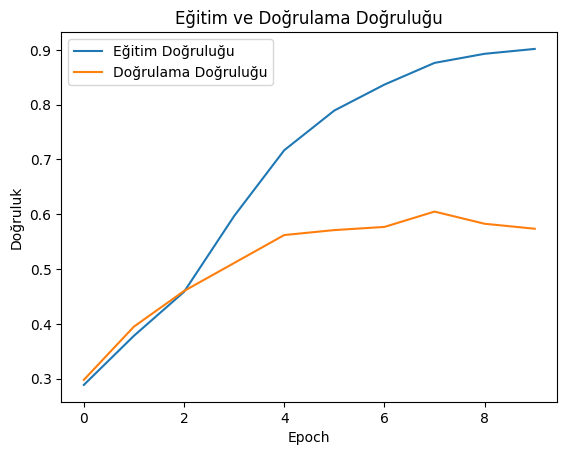

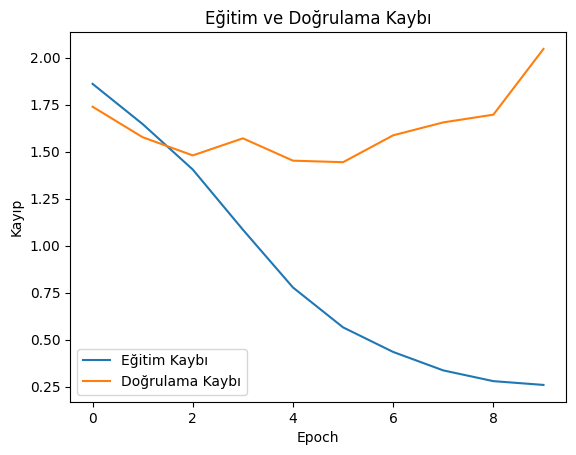

In [ ]:
import matplotlib.pyplot as plt

#1

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

#2

# Loss grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


1-)This part is used to plot the training and validation accuracy.
-plt.plot(): Used to create a plot., history.history['accuracy']: Gets training accuracy values., history.history['val_accuracy']: Gets validation accuracy values.   
-plt.xlabel(): Sets the label for the X-axis (Epoch).    
-plt.ylabel(): Sets the label for the Y-axis (Accuracy).     
-plt.legend(): Adds labels to the plot lines.  
-plt.title(): Sets the title of the graph.  
-plt.show(): Displays the graph.  

2-)This part is used to plot the training and validation loss.
-plt.plot(): Plots the training and validation loss on the same graph.,history.history['loss']: Retrieves training loss values.,history.history['val_loss']: Retrieves validation loss values.
-plt.xlabel(): Sets the label for the X-axis (Epoch).    
-plt.ylabel(): Sets the label for the Y-axis (Loss).    
-plt.legend(): Adds labels to the plot lines.  
-plt.title(): Sets the title of the graph.
-plt.show(): Displays the graph.   


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step


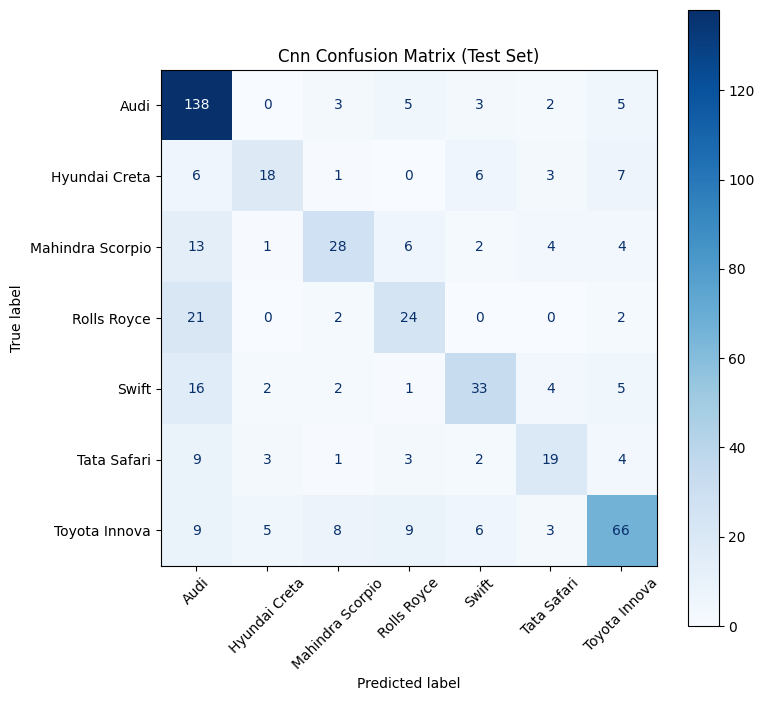

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#1

# Predict over the test set
test_pred = cnn_model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)

#2

# Real labels
true_labels = test_generator.classes

#3

# Create Confusion Matrix
cm = confusion_matrix(true_labels, test_pred_labels)

#4

# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)  # xticks_rotation=45
plt.title("Cnn Confusion Matrix (Test Set)")
plt.show()



1-) In this step, we obtain the model predictions on the test data.     
-model.predict(test_generator):Makes predictions on the test dataset., The predicted values are returned as probabilities.     
-np.argmax(test_pred, axis=1):Selects the maximum probability as the predicted class., axis=1: Finds the maximum value in each row (sample).   

2-)test_generator.classes:Returns the true class labels from the test data. , Used to compare with the model predictions.

3-)confusion_matrix(true_labels, test_pred_labels):Rows represent the actual labels, columns represent the predicted labels., Clearly shows correct and incorrect classifications.

4-)Used to visually plot the Confusion Matrix.
-ConfusionMatrixDisplay:Takes the matrix data and displays it visually., cmap='Blues': Creates a graph with blue shades.
-plt.title:Adds a title to the graph.        
-plt.show(): Displays the plot on the screen.



In [ ]:
import os
from collections import Counter

train_dir = '/content/drive/MyDrive/carbrand/train'

labels = []
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        count = len(os.listdir(folder_path))
        labels.append((folder, count))

for label, count in sorted(labels, key=lambda x: x[1], reverse=True):
    print(f"{label}: {count} görsel")


Audi: 1527 görsel
Toyota Innova: 1113 görsel
Rolls Royce: 594 görsel
Swift: 582 görsel
Tata Safari: 510 görsel
Mahindra Scorpio: 453 görsel
Hyundai Creta: 399 görsel


This loop finds each class folder within the training directory and counts the number of images inside.
-os.listdir(train_dir):Lists all subfolders (classes) within the training directory.                
-os.path.join(train_dir, folder):Joins the main directory path with the subfolder name.               
-os.path.isdir(folder_path):Selects only folder items (excludes files).                                          
-len(os.listdir(folder_path)):Finds the number of images within the folder.                                             
-labels.append((folder, count)):Adds the folder name and image count as a tuple to the list.              
-sorted(labels, key=lambda x: x[1], reverse=True):Sorts the classes by the number of images, in descending order.         
-print(f"{label}: {count} images"):Displays the class name and the number of images.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_indices = train_generator.classes
weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_indices), y=class_indices)
class_weights = dict(enumerate(weights))

print("Class weights:", class_weights)


Class weights: {0: np.float64(0.48442323884367106), 1: np.float64(1.853920515574651), 2: np.float64(1.6329233680227058), 3: np.float64(1.2453102453102454), 4: np.float64(1.2709867452135493), 5: np.float64(1.4504201680672268), 6: np.float64(0.6646130150173277)}


class_indices = train_generator.classes = This line fetches the class indices from the training data.       
-train_generator.classes:Returns class labels from the training data generator.                  
-compute_class_weight:class_weight='balanced': Balances the weights according to class distribution.                    
-classes=np.unique(class_indices): Finds unique class labels.
-y=class_indices: Uses class labels from the training data generator.                         
-dict(enumerate(weights)):Converts weight values into a dictionary format., Uses class indices as keys.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#1
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#2
for layer in base_model.layers:
    layer.trainable = False

#3
tl_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

#4
tl_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


1-) Loads the VGG16 model without the top fully connected layers (include_top=False) and with input shape of (224, 224, 3). The model uses weights from ImageNet for transfer learning.                                     
2-)Freezes all layers of the pre-trained VGG16 model to prevent their weights from being updated during training. This ensures that only the new layers are trained.                                                                                                                                                      3-)Flatten(): Converts the feature map into a 1D vector, Dense(128, activation='relu'): Fully connected layer with 128 neurons and ReLU activation, Dropout(0.5): Regularization to prevent overfitting, Dense(train_generator.num_classes, activation='softmax'): Output layer with softmax activation for multi-classclassification.      

4-)Compiles the model using the Adam optimizer, sparse categorical crossentropy as the loss function, and accuracy as the evaluation metric.


In [ ]:
history_tl = tl_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 4263s 26s/step - accuracy: 0.1845 - loss: 2.5255 - val_accuracy: 0.4354 - val_loss: 1.7489
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 4159s 26s/step - accuracy: 0.3969 - loss: 1.6980 - val_accuracy: 0.5276 - val_loss: 1.5431
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 4157s 26s/step - accuracy: 0.4195 - loss: 1.5326 - val_accuracy: 0.4914 - val_loss: 1.5593
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 4094s 25s/step - accuracy: 0.3904 - loss: 1.5095 - val_accuracy: 0.4979 - val_loss: 1.3959
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 4157s 26s/step - accuracy: 0.3440 - loss: 1.4746 - val_accuracy: 0.6058 - val_loss: 1.3140


This code block is used for training the model.  
-train_generator:Data generator that supplies the training data.
Feeds data to the model in the required format and initiates training.     
-epochs=10:Specifies how many iterations over the entire dataset the model will perform.   
-validation_data=validation_generator:Provides validation data to assess model performance during training. , The model's generalization ability is measured after each epoch.                              
-class_weight=class_weights:Passes class weights to the model to handle class imbalance., Ensures that the model does not ignore minority classes during training.                                                      
-callbacks=[early_stop]:Enables the early stopping mechanism during training., Stops training if no improvement in validation loss is observed.

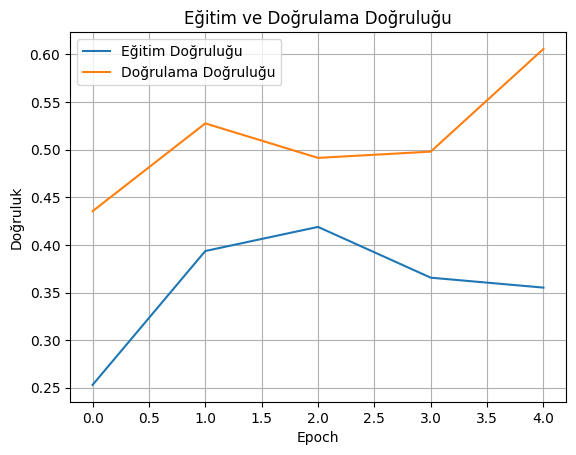

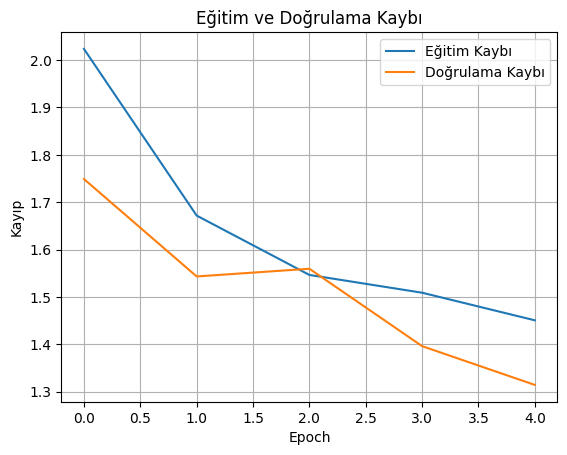

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history_tl.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_tl.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.grid(True)
plt.show()

# Loss graph
plt.plot(history_tl.history['loss'], label='Eğitim Kaybı')
plt.plot(history_tl.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.grid(True)
plt.show()


1-)This part is used to plot the training and validation accuracy.
-plt.plot(): Used to create a plot., history.history['accuracy']: Gets training accuracy values., history.history['val_accuracy']: Gets validation accuracy values.   
-plt.xlabel(): Sets the label for the X-axis (Epoch).    
-plt.ylabel(): Sets the label for the Y-axis (Accuracy).     
-plt.legend(): Adds labels to the plot lines.  
-plt.title(): Sets the title of the graph.  
-plt.show(): Displays the graph.  

2-)This part is used to plot the training and validation loss.
-plt.plot(): Plots the training and validation loss on the same graph.,history.history['loss']: Retrieves training loss values.,history.history['val_loss']: Retrieves validation loss values.
-plt.xlabel(): Sets the label for the X-axis (Epoch).    
-plt.ylabel(): Sets the label for the Y-axis (Loss).    
-plt.legend(): Adds labels to the plot lines.  
-plt.title(): Sets the title of the graph.
-plt.show(): Displays the graph.   


17/17 ━━━━━━━━━━━━━━━━━━━━ 352s 21s/step


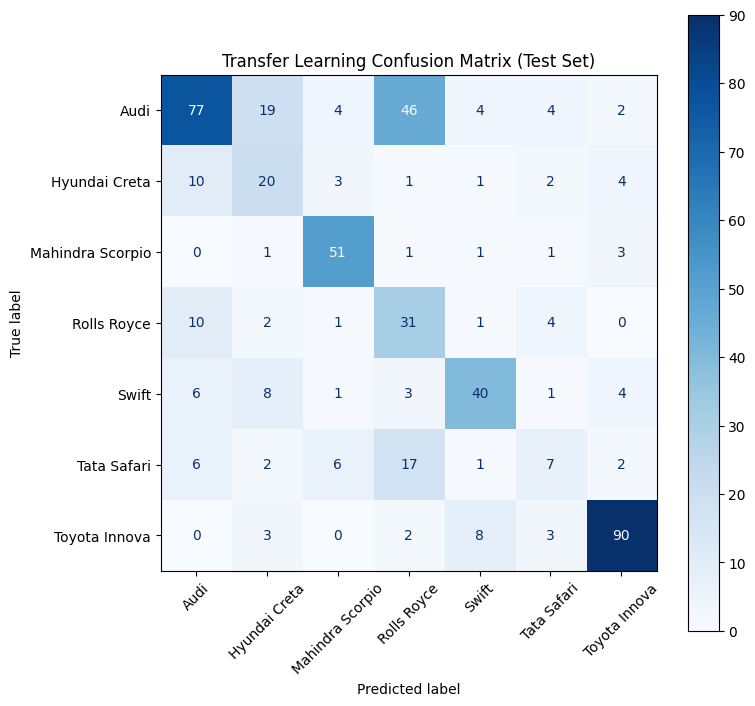

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict over the test set
test_pred = tl_model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)

# Real labels
true_labels = test_generator.classes

# Create Confusion Matrix
cm = confusion_matrix(true_labels, test_pred_labels)

# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Transfer Learning Confusion Matrix (Test Set)")
plt.show()


1-) In this step, we obtain the model predictions on the test data.     
-model.predict(test_generator):Makes predictions on the test dataset., The predicted values are returned as probabilities.     
-np.argmax(test_pred, axis=1):Selects the maximum probability as the predicted class., axis=1: Finds the maximum value in each row (sample).   

2-)test_generator.classes:Returns the true class labels from the test data. , Used to compare with the model predictions.

3-)confusion_matrix(true_labels, test_pred_labels):Rows represent the actual labels, columns represent the predicted labels., Clearly shows correct and incorrect classifications.

4-)Used to visually plot the Confusion Matrix.
-ConfusionMatrixDisplay:Takes the matrix data and displays it visually., cmap='Blues': Creates a graph with blue shades.
-plt.title:Adds a title to the graph.        
-plt.show(): Displays the plot on the screen.



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


classification_report: Generates a detailed performance report.                  
accuracy_score: Calculates the accuracy of predictions.                          
precision_score: Measures how many selected items are relevant.                  
recall_score: Measures how many relevant items are selected.                     
f1_score: Combines precision and recall into one metric.                          


In [ ]:
# Tahminleri al
test_pred = tl_model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)

# Gerçek etiketler
true_labels = test_generator.classes


17/17 ━━━━━━━━━━━━━━━━━━━━ 328s 19s/step


model.predict(test_generator): Uses the trained model to predict labels for the test dataset.                                                                    
np.argmax(test_pred, axis=1): Converts the probability output of the model to class labels by selecting the index with the highest value.                      
true_labels = test_generator.classes:                                           Retrieves the actual labels from the test data generator.


In [ ]:
# Accuracy
accuracy = accuracy_score(true_labels, test_pred_labels)

# Precision, Recall, F1-Score
precision = precision_score(true_labels, test_pred_labels, average='weighted')
recall = recall_score(true_labels, test_pred_labels, average='weighted')
f1 = f1_score(true_labels, test_pred_labels, average='weighted')

# Detaylı Rapor
report = classification_report(true_labels, test_pred_labels, target_names=test_generator.class_indices.keys())

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))
print("\nClassification Report:\n", report)


Accuracy: 61.48%
Precision: 64.96%
Recall: 61.48%
F1-Score: 61.79%

Classification Report:
                   precision    recall  f1-score   support

            Audi       0.71      0.49      0.58       156
   Hyundai Creta       0.36      0.49      0.42        41
Mahindra Scorpio       0.77      0.88      0.82        58
     Rolls Royce       0.31      0.63      0.41        49
           Swift       0.71      0.63      0.67        63
     Tata Safari       0.32      0.17      0.22        41
   Toyota Innova       0.86      0.85      0.85       106

        accuracy                           0.61       514
       macro avg       0.58      0.59      0.57       514
    weighted avg       0.65      0.61      0.62       514



accuracy = accuracy_score(true_labels, test_pred_labels): Calculates the model accuracy by comparing the true labels with the predicted labels.                 
average='weighted': Calculates metrics for each label and finds their average, weighted by support.                                                             
Precision: How many of the predicted positive cases are correct.                 
Recall: How many of the actual positive cases are captured.                        
F1-Score: Harmonic mean of precision and recall.                                 
report = classification_report(true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()): Creates a classification report that includes precision, recall, F1-score, and support for each class.     